**Project Aim** <br>
This notebooks is to apply Support Vector Machines to a Classification problem

We will develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem.

**Data Description** 
For this problem, we use the MNIST data which is a large database of handwritten digits. The 'pixel values' of each digit (image) comprise the features, and the actual number between 0-9 is the label.

Since each image is of 28 x 28 pixels, and each pixel forms a feature, there are 784 features. MNIST digit recognition is a well-studied problem in the ML community, and people have trained numerous models (Neural Networks, SVMs, boosted trees etc.) achieving error rates as low as 0.23% (i.e. accuracy = 99.77%, with a convolutional neural network).

Before the popularity of neural networks, though, models such as SVMs and boosted trees were the state-of-the-art in such problems.

We'll first explore the dataset a bit, prepare it (scale etc.) and then experiment with linear and non-linear SVMs with various hyperparameters.

**Project Assumptions**

**Project Objective**
~~- Basic EDA of the MNIST Dataset~~
    - ~~How should pixal data be analysed? ~~
    - ~~Plot example of the pixel data~~ 
    - ~~What columns are identical or have very similar distributions?~~
- Understand the framework of support vector machines 
    - Build a model that overfits a small proporion of the dataset and how to reach this conclusion
    - Understand methods to select features for classification problems
    - Include bias/variance trade off analysis
    - liblinear and libvsm libraries 
    ~~- Cross Validation Strategy (Shuffle data & Stratified Sample)~~
    - Sci-Kit Learns Transformation Pipeline (page 66 - Hands on ML with Sci-kit Learn sklearn.pipeline import Pipeline)
~~- Application of multiple Kernal Types and model performance analysis~~
~~- Understand and apply an appropriate loss function ~~
    ~~- Hinge Loss~~
- Feature Selection/Scaling
    - Add randomised features
  ~~- Implement Scaling/Normalisation using Sci-kit learn Pipeline~~
- Hyperparameter Tuning (Implement and understand grid search plus evaluate where the model over/underfits)
    - Grid Search for parameters (page 72 - Hands on ML): Determine which parameters need to be optimised 
- Understand how explainability may be applied to SVM Classification problems
- Investigate if SVM model can be plotted 
    - Error evaluation: Where does the system commonly make mistakes and how can this be improved?
    - Decision function in sklearn
    - Confusion Matrix for Multiclassification
    - Precision-Recall Curve
    - RoC Curve
- Tidy up the final solution 
    - Neatly store: Date/Data set/Pickle Model/Performance score
    - Dockerise
- Document brief conclusions 
    - Think where bias might be incorporated in the model and how this can be treated --- Poor quality measures?
    - What is the scope that the model can predict and where could it have issues generalising e.g. new categories?
- Document and understand 3 key learning from other kaggle solutions
    - https://www.kaggle.com/nishan192/mnist-digit-recognition-using-svm
    ~~- https://www.kaggle.com/azzion/svm-for-beginners-tutorial~~
    ~~- https://www.kaggle.com/fengdanye/machine-learning-4-support-vector-machine~~
    - https://www.kaggle.com/residentmario/kernels-and-support-vector-machine-regularization

**Support Vector Machine Notes**
~~- Hands-On Machine Learning with Scikit-Learn & Tensorflow~~
~~- Mastering Predictive Analytics with R~~
~~- Andrew Ng SVM <br>~~
~~https://www.youtube.com/watch?v=XfyR_49hfi8&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=74~~

**Parameters**
~~- Choice of parameter C~~
~~- Choice of kernel (similarity function)~~
    ~~- Linear SVM uses no Kernel: Standard linear classifier (use when large number of features but small dataset)~~
    ~~- Gaussian: Will require selection of parameter sigma^2 (use when small number of features but large training set)~~
    ~~- **Perform feature scaling before implementing a gaussian kernel**~~

**Algorithm Performance on MNIST Dataset**
For MNIST Data set there is no need to create dummy variables or handle missing data as data set doesn't have any missing data

- Benchmark Model:
- Optimal Performance (Personal): 
- Optimal Performance (Kaggle): Error rates as low as 0.23% (99.77 Accuracy)

**References** <br>
~~https://www.kaggle.com/jwlee508/data-analysis-for-kaggle-mnist~~ <br> 
~~https://towardsdatascience.com/an-intro-to-kernels-9ff6c6a6a8dc~~ <br>
~~https://www.researchgate.net/publication/230800948_The_Secrets_to_Managing_Business_Analytics_Projects~~ <br>
https://machinelearningmastery.com/feature-selection-subspace-ensemble-in-python/ <br>
https://towardsdatascience.com/one-potential-cause-of-overfitting-that-i-never-noticed-before-a57904c8c89d <br>

In [9]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
os.getcwd()

'/Users/Rej1992/Documents/GitHub/SupportVectorMachines/notebooks'

In [7]:
train_data = pd.read_csv('/Users/Rej1992/Desktop/SVM_Data/mnist_train.csv')
test_data = pd.read_csv('/Users/Rej1992/Desktop/SVM_Data/mnist_test.csv')

In [11]:
print(train_data.shape)
print(test_data.shape)

(60000, 785)
(10000, 785)


In [12]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


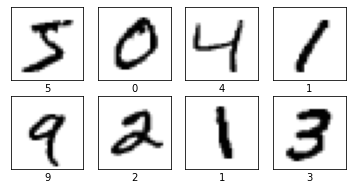

In [8]:
X_t = train_data.drop(["label"], axis=1)
Y_t = train_data.label.values

plt.figure(figsize=(6,3))
X = X_t.to_numpy().reshape(60000, 28, 28)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(str(Y_t[i]))
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='label'>

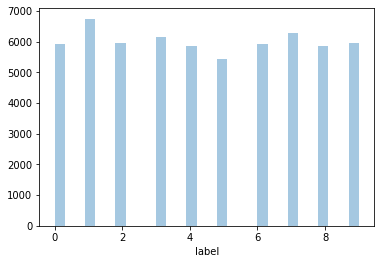

In [10]:
sns.distplot(train_data['label'], kde = False, bins = 30)

In [ ]:
# Create a representative sample of the data set
train_data = train_data.sample(n = 2000, replace = False) 
test_data = test_data.sample(n = 2000, replace = False) 

In [ ]:
# Remove duplicated columns 
train_data = train_data.loc[:,~train_data.columns.duplicated()]
test_data = test_data.loc[:,~test_data.columns.duplicated()]

In [ ]:
def _remove_columns_unique_values(data):
    
    nunique = data.apply(pd.Series.nunique)
    cols_to_drop = nunique[nunique == 1].index
    
    return data.drop(cols_to_drop, axis=1)

test_data = _remove_columns_unique_values(test_data)
train_data = _remove_columns_unique_values(train_data)

In [ ]:
# Check column overlap
print(test_data.columns.difference(train_data.columns))
print(train_data.columns.difference(test_data.columns))

In [ ]:
# Retain only columns that exist in the test data set
train_data = train_data.drop(train_data.columns.difference(test_data.columns), axis=1)
test_data = test_data.drop(test_data.columns.difference(train_data.columns), axis=1)

In [ ]:
# Verfiy the data type 
train_data.dtypes.unique()

In [ ]:
# Remove missing targets
train_data = train_data[train_data.label.notnull()]

In [ ]:
# Analyse the distribution of the target
import seaborn as sns
sns.catplot(x="label", kind="count", palette="ch:.25", data=train_data)

In [ ]:
train_data.std().sort_values(ascending=False).head(10)

In [ ]:
train_data = train_data[['label', '14x15', '15x15', '23x12', '23x13', '17x14', '15x18', '16x14', '16x18', '7x16', '7x15']]

In [ ]:
train_data.describe()

In [ ]:
train_data.isnull().sum()

In [13]:
corrmat = train_data.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,annot_kws={'size':8})

<AxesSubplot:>

Error in callback <function flush_figures at 0x113e57598> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Feature Engineering 
## Normalisation/Standardisation
## Discretise continuous variables 
## Feature transformations and interactions (product/sum etc.)
## Create a set of randomised features 

In [ ]:
# spot check machine learning algorithms on the adult imbalanced dataset
# https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Establish X and y & label encode the target variable to have the classes 0 and 1
y = LabelEncoder().fit_transform(train_data.label)
X = train_data.drop('label', 1)
num_ix = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Create a benchmark dummy model
from sklearn.dummy import DummyClassifier

for strat in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy_maj = DummyClassifier(strategy=strat).fit(X_train, Y_train)
    print("Train Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_train,Y_train)))
    print("Test Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_test,Y_test)))

In [ ]:
# from sklearn.preprocessing import scale
# X_scaled = scale(X)

# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)


# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #cv = StratifiedKFold(5,random_state=10,shuffle=True)
        
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    print("The Stratified Cross Validation Score :"+str(scores))
    print("The Average Stratified Cross Validation Score :"+str(scores.mean()))
    
    return scores

In [ ]:
#Attempt differing values of C
from sklearn.svm import LinearSVC

for this_C in [1,3,5,10,40,60,80,100]:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,Y_train) ## Linear only has C parameter
    clf2 = LinearSVC(C=this_C).fit(X_train,Y_train)
    clf3 = SVC(kernel='rbf',C=this_C).fit(X_train,Y_train) ## # SMV with RBF KERNAL AND ONLY C PARAMETER 
    scoretrain = clf.score(X_train,Y_train)
    scoretest  = clf.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

    
# # SVM WITH RBF KERNAL, C AND GAMMA HYPERPARAMTER 
# for this_gamma in [.1,.5,.10,.25,.50,1]:
#     for this_C in [1,5,7,10,15,25,50]:
#         clf3 = SVC(kernel='rbf',C=this_C,gamma=this_gamma).fit(X_train,Y_train)
#         clf3train = clf3.score(X_train,Y_train)
#         clf3test  = clf3.score(X_test,Y_test)
#         print("SVM for Non Linear \n Gamma: {} C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_gamma,this_C,clf3train,clf3test))


In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1,5,7,10,15,25,50],
              'gamma': [.1,.5,.10,.25,.50,1]}
GS = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5)

GS.fit(X_train,Y_train)

print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_))

In [ ]:
# Define models to test: Support Vector Machine 
def get_models():
    models, names = list(), list()
    
    # SVM Linear Kernel
    model.append(SVC(kernel='linear'))
    names.append('SVM_Linear')
    
    
    #svc = LinearSVC(C=1,loss="hinge")

    
    # SVM
    models.append(SVC(gamma='scale'))
    names.append('SVM_Gamma')
    
    # GBM
    models.append(GradientBoostingClassifier(n_estimators=100))
    names.append('GBM')
    
        
    return models, names

In [ ]:
# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    # define steps
    steps = [('n', MinMaxScaler(), num_ix)]
    
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer(steps)
    
    # wrap the model i a pipeline
    pipeline = Pipeline(steps=[('t',ct),('m',models[i])])
    
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    
    # summarize performance
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
    
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

In [ ]:
## Visualise the model decision boundary 

# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

In [ ]:
## Visualise the model decision boundary 
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='linear',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
    y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))

plt.show()